# pandas

Når vi skal jobbe med data som passer på tabellformat kan livet vårt bli svært mye enklere om vi brukere et bibliotek som heter *pandas*. Det skal da lite kode til for å lese inn filer og for å gjøre enkle plots. Dessuten passer dataformatet i pandas sammen med flere kjente maskinlæringsbiblioteker som *tensorflow* og *scikit-learn*. Dermed slipper vi å bruke tid på å manipulere data til å passe inn i spesifikke formater for hvert bibliotek vi skal bruke. 

Når man bruker kraftige biblioteker for databehnadling, vil det alltid være mange funksjoner man ikke kan navnet på, eller ikke vet hva gjør. Det er helt greit, og helt vanglig. Det er lov til å si at man "kan pandas" uten å vite hva alle funksjonene gjør, på samme måte som det er lov å si man kan engelsk selv om man ike vet betydningen av *floccinaucinihilipilification*.

```{admonition} Søk i dokumentasjonen
:class: note 

Når vi jobber med *pandas* kommer vi til å bruke mange forskjellige funksjoner med mange forskjellige navn. Den eneste måten å huske alle disse på, er å bruke dem jevnlig. Det er det ikke så mange av oss som gjør, og dermed kan vi like godt gi opp å huske alle funksjonene. Prøv heller å gjøre det til en vane å søke i [pandas-dokumenasjonen](https://pandas.pydata.org/docs/user_guide/10min.html) for å finne en funksjon som gjør det du ønsker å få til.

``` 

Når vi jobber med datavitenskap er det ofte hensiktsmessig å bruke *Jupyter notebook* i *JupyterLab*. Vi kan kjøre JupyterLab både lokalt på maskinen vår og på forskjellige skytjenester. Vi anbefaler å begynne på egen maskin. Etterhvert kan det hende vi vil bruke Kaggle eller Google Colab som skytjenester, fordi de gir tilgang på en fornuftig mengde regnekraft. I del 1 av kurset skal vi jobbe med prosjekter som ikke krever noe særlig regnekraft, og da fungerer det fint å kjøre lokalt. 

I denne økta skal vi bruke Jupyter notebook til å trene på å lese inn og visualisere data med *Pandas* og *Matplotlib*.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

## Lese inn data
Når vi skal analysere datasett, er det første vi må gjøre å lese inn dataene. Data kan finnes i mange forskjellige formater: Tabeller, bilder, lister osv. I første omgang skal vi forholde oss til tabeller. Dette svarer til excel-ark og csv-filer. 

La oss lese inn en tabell med data fra en csv-fil (comma separated values-fil). Vi begynner med en fil som inneholder lite nok data til at vi kan sjekke manuelt at det gikk bra. 

In [2]:
df = pd.read_csv("./data/filmer.csv")
display(df)

FileNotFoundError: [Errno 2] No such file or directory: './data/filmer.csv'

```{admonition} Csv-filer
:class: warning 

Siden komma er standard desimalskilletegn i Norge, mens punktum brukes i USA, oppstår det i blant trøbbel når vi skal lese inn norske CSV-filer. De bruker nemlig ofte semikolon i stedet for komma til å separere verdiene. Dette løser vi ved å bruke `delimiter=";"` som argument til `read_csv`. 
```

## Kaste ut data vi ikke skal bruke

Ofte har en csv fil kollonner eller data vi ikke skal bruke, og da blir det ryddigere å ikke ha de med. Hvis vi f.eks vil undersøke hvilket år som hadde de beste filmene trenger vi ikke navnene eller rangeringene.

In [3]:
data = df.drop(["Rangering", "Navn"], axis=1)

Man kan også fjerne rader med data, enten ved å fjerne spesifikke rader eller ved å filtrere på ulike måter. Hvis man f.eks tenker at superheltfilmer ikke er ekte filmer, kan man fjerne The Dark Knight fra datasettet med indeksen dens. Og hvis man mener det ikke ble laget ekte filmer før 70-tallet kan man filtrere de ut slik:

In [4]:
data_filtered = data.drop([3])
data_filtered = data_filtered[data_filtered["År"] >= 1970]
display(data_filtered)

,År,IMDb Rating
0,1994,9.2
1,1972,9.1
2,1974,9.0
5,1993,8.9
6,2003,8.9
7,1994,8.8
9,2001,8.8


## Lage en dataframe manuelt

I blant trenger vi å skrive inn data manuelt. Da er det fint å vite hvordan vi kan lage en *Pandas* *DataFrame* fra grunnen. Dette kan også være nyttig om vi skal sette inn data fra eksempelvis *numpy*-arrayer i en *DataFrame*. En enkel og ryddig måte å lage en *DataFrame* er å først legge dataene i en *dictionary* og deretter be *Pandas* lage en *DataFrame* av denne dictionary'en.

In [5]:
data = {"innsats" : [2, 4, 3, 8, 4, 1, 6, 6, 10, 3, 7], 
        "talent" : [4, 5, 3, 4, 6, 2, 3, 5, 2, 4, 5], 
        "resultat" : [24, 73, 25, 185, 93, 4, 55, 110, 198, 42, 155]}
grit_data = pd.DataFrame(data)

Vi er interresert i å se på sammenhengen mellom de ulike kolonnene i datasettet. En scatter matrise plotter fordelingen av de ulike verdiene for hver av kolonnene med søylediagrammer, og hvordan disse verdieme sammenfaller med scatter plots.

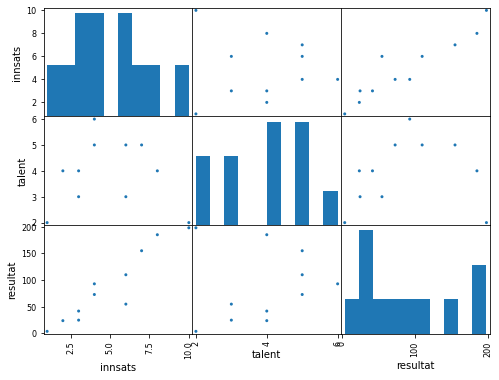

In [6]:
hfig = pd.plotting.scatter_matrix(grit_data, figsize=(8,6), alpha=1)
plt.show()

```{admonition} Ta imot returvariabelen fra plottingen
:class: note

Noen ganger vil plottekommandoer returnere et objekt som holder på figuren vi har laget. Dette objektet kan vi senere bruke om vi vil endre på farger, fontstørrelser og så videre. Det er ofte også slik at om vi ikke eksplisitt tar imot returvariabelen fra en plottekommando, får vi en del unyttig tekst i output-vinduet (med mindre man bruker plt.show()).
```

## Et større datasett: Presidenvalget i USA, 2020

In [7]:
data = pd.read_csv("./data/president_county_candidate.csv")
display(data)

,state,county,candidate,party,votes
0,Delaware,Kent County,Joe Biden,DEM,44552
1,Delaware,Kent County,Donald Trump,REP,41009
2,Delaware,Kent County,Jo Jorgensen,LIB,1044
3,Delaware,Kent County,Howie Hawkins,GRN,420
4,Delaware,New Castle County,Joe Biden,DEM,195034
...,...,...,...,...,...
31107,Arizona,Maricopa County,Donald Trump,REP,993691
31108,Arizona,Maricopa County,Jo Jorgensen,LIB,31608
31109,Arizona,Mohave County,Donald Trump,REP,78534
31110,Arizona,Mohave County,Joe Biden,DEM,24831


Når vi leser inn slik i en jupyter notebook, får vi opp en visning av deler av tabellen. Om det er en veldig liten tabell ser vi hele. I dette tilfellet har vi lastet inn en tabell med valgresultatene for presidentvalget i USA i 2020. Det er en liste med mye innhold. La oss i første omgang bare lese ut litt forskjellige data fra tabellen, for å demonstrere hvordan vi *aksesserer* deler av dataene fra tabellen.

In [8]:
display(data[data["state"] == "Delaware"])
display(data[data["candidate"] == "Joe Biden"])

,state,county,candidate,party,votes
0,Delaware,Kent County,Joe Biden,DEM,44552
1,Delaware,Kent County,Donald Trump,REP,41009
2,Delaware,Kent County,Jo Jorgensen,LIB,1044
3,Delaware,Kent County,Howie Hawkins,GRN,420
4,Delaware,New Castle County,Joe Biden,DEM,195034
5,Delaware,New Castle County,Donald Trump,REP,88364
6,Delaware,New Castle County,Jo Jorgensen,LIB,2953
7,Delaware,New Castle County,Howie Hawkins,GRN,1282
8,Delaware,Sussex County,Donald Trump,REP,71230
9,Delaware,Sussex County,Joe Biden,DEM,56682


,state,county,candidate,party,votes
0,Delaware,Kent County,Joe Biden,DEM,44552
4,Delaware,New Castle County,Joe Biden,DEM,195034
9,Delaware,Sussex County,Joe Biden,DEM,56682
12,District of Columbia,District of Columbia,Joe Biden,DEM,35485
19,District of Columbia,Ward 2,Joe Biden,DEM,26086
...,...,...,...,...,...
31098,Arizona,Graham County,Joe Biden,DEM,4034
31101,Arizona,Greenlee County,Joe Biden,DEM,1182
31104,Arizona,La Paz County,Joe Biden,DEM,2236
31106,Arizona,Maricopa County,Joe Biden,DEM,1038364


Det finnes mange flere måter å hente ut data på. Vi kommer til å introdusere dem i det tempoet vi trenger dem. Det er for kjedelig å liste opp alle mulige måter, og for dem som trenger å lese om alle måtene for å få sove godt om natta, finnes denne informasjonen [andre steder](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html). 

La oss så begynne å regne litt. Kanskje er vi interessert i å finne ut hvor mange stemmer Donald trump fikk totalt i staten Delaware. Da kan vi summere opp stemmene for de radene i tabellen som svarer til Donald Trump og Delaware. 

In [9]:
subset = data[data["state"] == "Delaware"]
subset = subset[subset["candidate"] == "Donald Trump"]

trump_votes_delaware = 0
for number in subset["votes"]: 
    trump_votes_delaware += number
    
print(f"Donald Trump fikk {trump_votes_delaware} stemmer i Delaware")

Donald Trump fikk 200603 stemmer i Delaware


In [10]:
data[(data.state == "Delaware") & (data.candidate == "Donald Trump")]["votes"].sum()

200603

Over skjer det litt av hvert. For det første bruker vi et sammensatt logisk uttrykk for å hente ut de linjene i tabellen som inneholder *både* staten "Delaware" *og* kandidaten "Donald Trump". Når vi har hentet ut linjene som oppfyller disse kriteriene, velger vi kolonnen "votes", siden vi er interessert i antallet stemmer. Til slutt bruker vi `sum`-funksjonen på DataFrame-objektet. DataFrame-objektet er pandas sin vanlige måte å holde på data. 

## Gruppere data

In [11]:
by_candidate_sum = data.groupby("candidate", as_index=False).sum()
by_candidate_sum = by_candidate_sum.sort_values(by="votes")

display(by_candidate_sum.head()) #viser kun de fem første radene

display(by_candidate_sum.tail()) #viser kun de fem siste radene

,candidate,votes
37,Zachary Scalf,29
26,Keith McCormic,127
13,Gary Swing,143
23,Jordan Scott,173
24,Joseph Kishore,192


,candidate,votes
1,Write-ins,155165
15,Howie Hawkins,376714
19,Jo Jorgensen,1808321
12,Donald Trump,72691128
20,Joe Biden,78220235


Her innser vi for det første at det ar veldig mange kandidater. La oss så plotte resultatene for alle disse kandidatene:

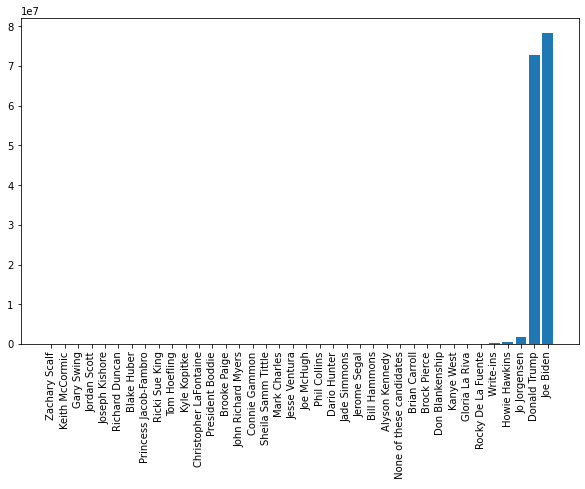

In [12]:
plt.figure(figsize=(10,6))
plt.bar(by_candidate_sum["candidate"], by_candidate_sum["votes"])
plt.xticks(rotation=90)
plt.show()

## Henting av subsets og kollaps av subsets

Hvis vi vil hente ut en del av dataene til en ny dataframe, som f.eks alle radene med Biden stemmer gjør vi det slik:

In [13]:
biden = data[data["candidate"] == "Joe Biden"]
trump = data[data["candidate"] == "Donald Trump"]

Hvis vi så vil slå sammen alle delene av dataene som har samme verdi for "state" gjør vi det slik. Her slår vi de sammen ved å summere verdiene, men det går også ann å ta gjennomsnitt eller bare telle antall rader.

In [14]:
biden_states = biden.groupby("state").sum() #.mean() og .size() er også nyttige ofte!
trump_states = trump.groupby("state").sum()

Nå har vi to dataframes som holder antall stemmer hver kandidat har i hver stat, så vi kan f.eks regne ut forskjellen og plotte den:

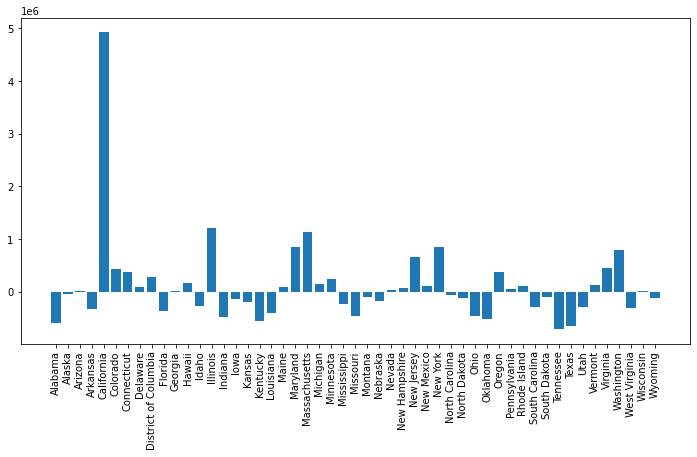

In [15]:
diff_states = biden_states - trump_states

plt.figure(figsize=(12,6))
plt.bar(diff_states.index, diff_states["votes"])
plt.xticks(rotation=90)
plt.show()

## Masker for å effektivt hente subsets av subsets

I forrige eksempel brukte vi en maske(rekke med `True` og `False` verdier) for å plukke ut verdiene vi ville ha med i dataframen `biden`.

```
biden = data[data["candidate"] == "Joe Biden"]
```

Masken er det inni hakeparantesen, og kan bli lagret i en egen variabel:

```
biden_mask = data["candidate"] == "Joe Biden"
```
Dette blir utrolig nyttig om vi skal ha tak i mange ulike subsets av subsets av dataen. Dette eksempelet illustrerer ikke dette veldig godt, siden vi har få kollonner å jobbe med, men i datasett med egenskaper som kjønn, alder og rase blir dette helt nødvendig for å effektivt hente alle mulige kombinasjoner som hvite menn, asiatiske kvinner etc.

In [16]:
import numpy as np

In [29]:
biden_mask = data["candidate"] == "Joe Biden"
trump_mask = data["candidate"] == "Donald Trump"
other = np.logical_not(np.logical_or(biden_mask, trump_mask)) #evt. ~(biden_mask | trump_mask)

even = data["votes"] % 2 == 0
more10k = data["votes"] >= 10000
more100k = data["votes"] >= 100000

Vi kombinerer masker med numpy sine logiske funksjoner. Man kan også bruke python sine innebygde [bitwise operatorer](https://realpython.com/python-bitwise-operators/#overview-of-pythons-bitwise-operators).


Hvis vi bare vil telle antall `True`, kan vi ta summen av masken. Hugs at masker også kan brukes til å hente ut en subset av dataen.

Trump fikk et partall antall stemmer i flere fylker:

In [30]:
print(np.logical_and(biden_mask, even).sum()) #evt. (biden_mask & even).sum()
print(np.logical_and(trump_mask, even).sum())

2354
2381


Trump fikk mer enn 10000 stemmer i flere fylker enn Biden:

In [31]:
print(np.logical_and(biden_mask, more10k).sum()) #evt. (biden_mask & more10k).sum()
print(np.logical_and(trump_mask, more10k).sum())

932
1347


Men Biden fikk med enn 100000 stemmer i flere fylker enn Trump!

In [32]:
print(np.logical_and(biden_mask, more100k).sum()) #evt. (biden_mask & more10k).sum()
print(np.logical_and(trump_mask, more100k).sum())

168
136


Vi kan lage en funksjon som sammenligner hvor mange fylker en maske gjelder for for hver kandidat. Denne kan vi bruke til å finne når Biden tok igjen Trump

In [21]:
def trumpVbiden(subset_mask=True):
    return np.logical_and(biden_mask, subset_mask).sum() < np.logical_and(trump_mask, subset_mask).sum()
    #evt. (biden_mask & subset_mask).sum() < (trump_mask & subset_mask).sum()

Biden tar igjen Trump i antall fylker når man ser på fylker med 67114 stemmer eller flere.

In [22]:
votes = 10000
while trumpVbiden(data["votes"] >= votes):
    votes += 1
    if votes > 100000:
        break
print(votes)

67114


For å finne hvilket fylke som var vippepunktet er det bare å lage en maske for 67113 stemmer. Trump mistet ledelsen i antall fylker når man ser på fylker med mer enn 67113 stemmer.

In [23]:
data[data["votes"] == votes-1]

,state,county,candidate,party,votes
18799,Texas,Bell County,Donald Trump,REP,67113


In [24]:
print(np.logical_and(biden_mask, data["votes"] >= votes).sum()) #evt. (biden_mask & (data["votes"] >= votes)).sum()
print(np.logical_and(trump_mask, data["votes"] >= votes).sum())

227
227


## Kombinere DataFrames (Bonus)
 
Noen ganger ønsker vi å kombinere tabeller. 
Vi er nå klare til å gjøre litt mer omfattende oppgaver. For eksempel om vi skal legge data fra presidentvalget inn i et kart. Da må vi kombinere kartdata og stemmedata. Vi kan bruke modulen `geopandas` til å lage figurer som viser fordelingen av stemmer rundt omkring i USA.

In [25]:
import geopandas as gp

In [26]:
states = gp.read_file("https://www2.census.gov/geo/tiger/GENZ2018/shp/cb_2018_us_state_500k.zip")

Først fjerner vi alle små kandidater fra dataen. Vi må så summere stemmene hver kandidat har per stat. Så må vi vri om dataframen slik at statene blir kolonnene, hver kandidat har en rad og antall stemmer er verdiene. Så gjør vi antall stemmer om til andel av alle stemmen i den staten. Til slutt slår vi sammen kartet og dataframen med alle stemmene slik at de kan dele data om hver stat. Da kan vi plotte og få andel av stemmer inn i kartet.

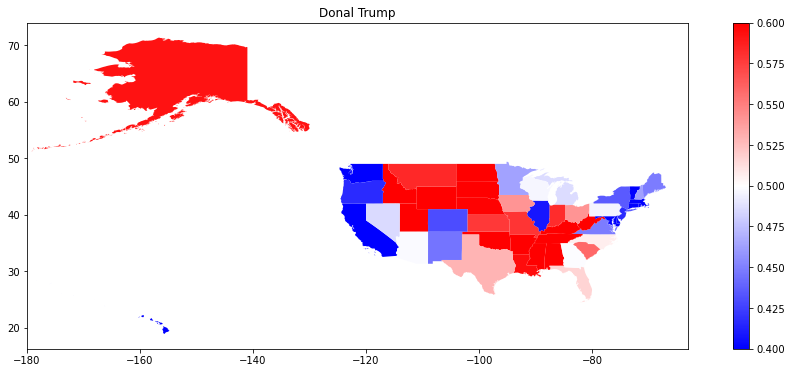

In [40]:
trumpOrBiden = data[(data["candidate"] == "Donald Trump") | (data["candidate"] == "Joe Biden")] #used bitwise or
votes_by_state = trumpOrBiden.groupby(["state", "candidate"], as_index=False)["votes"].sum()
votes_pivot = votes_by_state.pivot(index="state", columns="candidate", values="votes")
votes_share = votes_pivot.div(votes_pivot.sum(axis=1), axis=0)

plotting_df = pd.merge(states, votes_share, left_on="NAME", right_on="state")

plotting_df.plot(figsize=(16, 6), column="Donald Trump", cmap="bwr", legend=True, vmin=0.4, vmax=0.6)
plt.xlim(-180, -63)
plt.title("Donal Trump")
plt.show()

Større bredde av verdier lar oss se forskjellene mellom de røde statene og mellom de blå statene bedre, men gjør vippestatene vanskeligere å avklare.

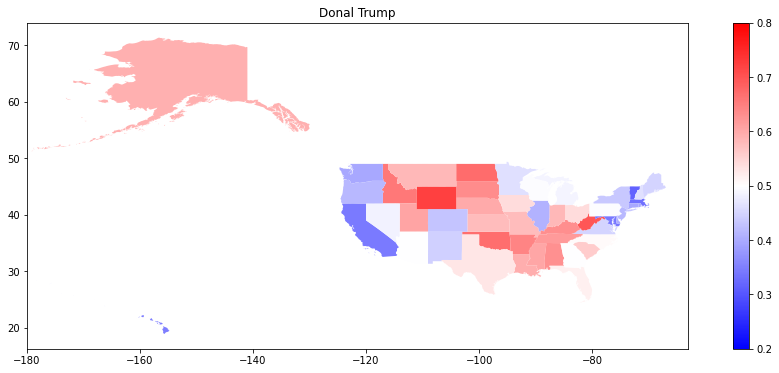

In [39]:
plotting_df.plot(figsize=(16, 6), column="Donald Trump", cmap="bwr", legend=True, vmin=0.2, vmax=0.8)
plt.xlim(-180, -63)
plt.title("Donal Trump")
plt.show()